- source code: [`kerasy.ML.decomposition`](https://github.com/iwasakishuto/Kerasy/blob/gh-pages/kerasy/ML/decomposition.py)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

## Data

In [3]:
from kerasy.datasets import mnist

In [4]:
seed = 0
Nimg_per_cls = 250

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
n_train, _, _ = x_train.shape
n_test,  _, _ = x_test.shape

In [7]:
x_train = x_train.reshape(n_train, -1)

In [8]:
# Chose Nimg_per_cls images for each class. 
idxes = np.concatenate([np.random.RandomState(seed).choice(np.where(y_train==cls)[0], Nimg_per_cls) for cls in np.unique(y_train)])

In [9]:
# Selected images and labels.
X = x_train[idxes]
Y = y_train[idxes]

In [10]:
N, D = X.shape
print(f"Num of data    : {N}")
print(f"Num of features: {D}")

Num of data    : 2500
Num of features: 784


In [11]:
# The dimensions of how many 
n_components = 2

In [12]:
def plotMNIST(X, Y, n_samples=N,method=""):
    """ Visualize the results. """
    for cls in np.unique(Y):
        idx = cls==Y
        plt.scatter(X[idx,0], X[idx,1], color=cm.jet(cls/10), s=20, label=cls)
    plt.legend(), plt.xlabel("Component 1", fontsize=14), plt.ylabel("Component 2", fontsize=14), plt.title(f"{method} (n_samples={n_samples})", fontsize=14)
    plt.show()

## PCA

In [13]:
from kerasy.ML.decomposition import PCA

In [14]:
model = PCA(n_components=n_components)

In [15]:
model.fit(X)

In [16]:
X_transformed = model.transform(X)

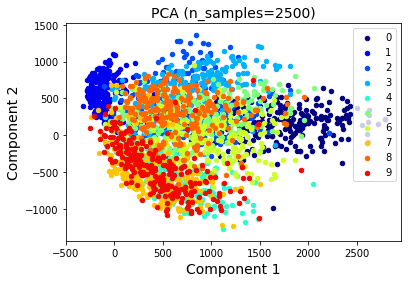

In [17]:
plotMNIST(X_transformed, Y, method="PCA")

## tSNE

In [18]:
from kerasy.ML.decomposition import tSNE

In [19]:
model = tSNE(initial_momentum = 0.5, final_momoentum = 0.8, eta = 500)

In [ ]:
X_transformed = model.fit_transform(X, n_components=n_components, initial_dims=50, perplexity=30.0, random_state=seed)

Preprocessing the data using PCA to reduce the dimentions 784→50
Each conditional Gaussian has the same perplexity: 30.0
Mean value of sigma: 0.001

1/10
100/100 [####################] 100.00% - 48.542s  KL(P||Q) = 16.972
2/10
100/100 [####################] 100.00% - 50.878s  KL(P||Q) = 1.514
3/10
078/100 [###############-----]  78.00% - 40.679s  KL(P||Q) = 1.342

In [ ]:
plotMNIST(X_transformed, Y, method="tSNE")

## kPCA